# **EEE 350 Final Project - Coding Tasks**

In [2]:
# Packages required for this project
import random
import matplotlib.pyplot as plt
import math
from math import *
import numpy as np
import scipy as sp
import sympy
from sympy import *
import scipy.integrate as integrate
import time

### **Task 3 - Simulating the Monty Hall Game with Monte Carlo Simulations**

In [138]:
def Monte_Carlo_Monty_Hall(N):
    # Set up variables for the Monte Carlo simulation for the Monty Hall game
    switch_success = 0
    switch_failure = 0
    no_switch_success = 0
    no_switch_failure = 0
    random_switch_success = 0
    random_switch_failure = 0
    switch_success_probabilities = []
    no_switch_success_probabilities = []
    random_switch_success_probabilities = []
    
    for i in range(N):
        # Set up the 3 doors and randomize the gae
        doors = ["car", "goat", "goat"]
        random.shuffle(doors)
        
        # Find the doors with goats
        doors_with_goats = []
        for i in range(len(doors)):
            if doors[i] == 'goat':
                doors_with_goats.append(i)

        # Select a door
        selected_door = random.randint(0, 2)
        
        # Case where selected door contains a car
        if doors[selected_door] != 'car':
            # Success case for always switch
            switch_success += 1
            # Failure case for never switch
            no_switch_failure += 1
            # Case for randomized switch
            del doors[selected_door]
            new_selected_door = random.randint(0, 1)
            if doors[new_selected_door] == 'car':
                # Success case for randomized switch
                random_switch_success += 1
            else:
                # Failure case for randomized switch
                random_switch_failure += 1
        # Case where selected door contains a goat
        else:
            # Failure case for always switch
            no_switch_success += 1
            # Success case for never switch
            switch_failure += 1
            # Case for randomized switch
            del doors[random.choice(doors_with_goats)]
            new_selected_door = random.randint(0, 1)
            if doors[new_selected_door] == 'car':
                # Success case for randomized switch
                random_switch_success += 1
            else:
                # Failure case for randomized switch
                random_switch_failure += 1

        # Calculate all probabilities are add it to their repsective lists
        probability_switch_success = switch_success / (switch_success + switch_failure)
        probability_no_switch_success = no_switch_success / (no_switch_success + no_switch_failure)
        probability_random_switch_success = random_switch_success / (random_switch_success + random_switch_failure)
        switch_success_probabilities.append(probability_switch_success)
        no_switch_success_probabilities.append(probability_no_switch_success)
        random_switch_success_probabilities.append(probability_random_switch_success)
    
    # Plot the probability distributions generated by the Monte Carlo simulation for Monty Hall for N trials
    plt.plot(switch_success_probabilities, label='Switching Doors')
    plt.plot(no_switch_success_probabilities, label='No Switching Doors')
    plt.plot(random_switch_success_probabilities, label='Random Switching Doors')
    plt.title(f"Monte Carlo Simulation of the Monty Hall Game for N = {N} Games")
    plt.xlabel("Number of Games N")
    plt.ylabel("Probability")
    plt.legend()

    # Print out the probabilities from the Monte Carlo simulation for Monty Hall for N trials
    print("Number of Games N =", N)
    print("Probability of Obtaining the Car by Switching Doors =", probability_switch_success)
    print("Probability of Obtaining the Car by not Switching Doors =", probability_no_switch_success)
    print("Probability of Obtaining the Car by Randomly Switching Doors =", probability_random_switch_success)

Number of Games N = 100
Probability of Obtaining the Car by Switching Doors = 0.67
Probability of Obtaining the Car by not Switching Doors = 0.33
Probability of Obtaining the Car by Randomly Switching Doors = 0.52


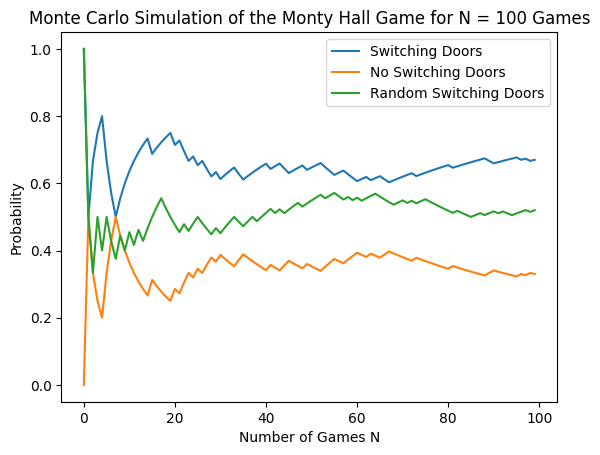

In [128]:
N = 100
Monte_Carlo_Monty_Hall(N)

Number of Games N = 1000
Probability of Obtaining the Car by Switching Doors = 0.665
Probability of Obtaining the Car by not Switching Doors = 0.335
Probability of Obtaining the Car by Randomly Switching Doors = 0.495


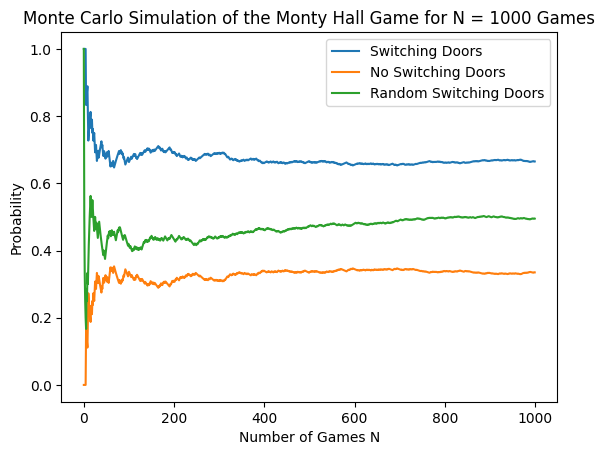

In [137]:
N = 1000
Monte_Carlo_Monty_Hall(N)

### **Task 5 - Monte Carlo Sampling to Calculate $\pi$**

In [532]:
def Monte_Carlo_Pi(N):
    # Set up variables for the Monte Carlo simulation for estimating pi
    points_in_circle = 0
    points_in_square = 0
    
    for i in range(N):
        # Select a random x and y coordinate where 0 <= x, y <= 1
        random_x = random.uniform(0, 1)
        random_y = random.uniform(0, 1)

        # Calculate the distance between the selected point and the origin (0, 0)
        distance_origin = random_x**2 + random_y**2

        # If the distance between the point and the origin is less than 1 (definition of circle)
        if distance_origin <= 1:
            # the point lies in the circle
            points_in_circle += 1
        
        # All points (x, y), where 0 <= x, y, <= 1, are in the square
        points_in_square += 1

        # Estimate pi by 4 * (Area of quarter circle of radius 1)/(Area of unit square)
        pi_estimate = 4 * points_in_circle / points_in_square

    return pi_estimate

In [399]:
print("Actual Value of pi =", math.pi)

Actual Value of pi = 3.141592653589793


In [162]:
N = 1
print("Number of Points N =", N)
print("Estimated Value of pi =", Monte_Carlo_Pi(N))

Number of Points N = 1
Estimated Value of pi = 4.0


In [165]:
N = 10
print("Number of Points N =", N)
print("Estimated Value of pi =", Monte_Carlo_Pi(N))

Number of Points N = 10
Estimated Value of pi = 3.6


In [310]:
N = 100
print("Number of Points N =", N)
print("Estimated Value of pi =", Monte_Carlo_Pi(N))

Number of Points N = 100
Estimated Value of pi = 3.12


In [150]:
N = 1000
print("Number of Points N =", N)
print("Estimated Value of pi =", Monte_Carlo_Pi(N))

Number of Points N = 1000
Estimated Value of pi = 3.14


In [382]:
N = 10000
print("Number of Points N =", N)
print("Estimated Value of pi =", Monte_Carlo_Pi(N))

Number of Points N = 10000
Estimated Value of pi = 3.142


In [424]:
N = 100000
print("Number of Points N =", N)
print("Estimated Value of pi =", Monte_Carlo_Pi(N))

Number of Points N = 100000
Estimated Value of pi = 3.141


In [426]:
N = 1000000
print("Number of Points N =", N)
print("Estimated Value of pi =", Monte_Carlo_Pi(N))

Number of Points N = 1000000
Estimated Value of pi = 3.141508


In [437]:
N = 10000000
print("Number of Points N =", N)
print("Estimated Value of pi =", Monte_Carlo_Pi(N))

Number of Points N = 10000000
Estimated Value of pi = 3.1415064


In [442]:
N = 100000000
print("Number of Points N =", N)
print("Estimated Value of pi =", Monte_Carlo_Pi(N))

Number of Points N = 100000000
Estimated Value of pi = 3.14152828


In [445]:
N = 1000000000
print("Number of Points N =", N)
print("Estimated Value of pi =", Monte_Carlo_Pi(N))

Number of Points N = 1000000000
Estimated Value of pi = 3.141557664


In [533]:
N = 10000000000
print("Number of Points N =", N)
print("Estimated Value of pi =", Monte_Carlo_Pi(N))

Number of Points N = 10000000000
Estimated Value of pi = 3.1415939008


### **Task 7 - Normalizing a PDF**

To normalize the PDF f_S = c*x*exp(-2*x), c = 5.436563656918093.


Text(0, 0.5, 'f_S(x)')

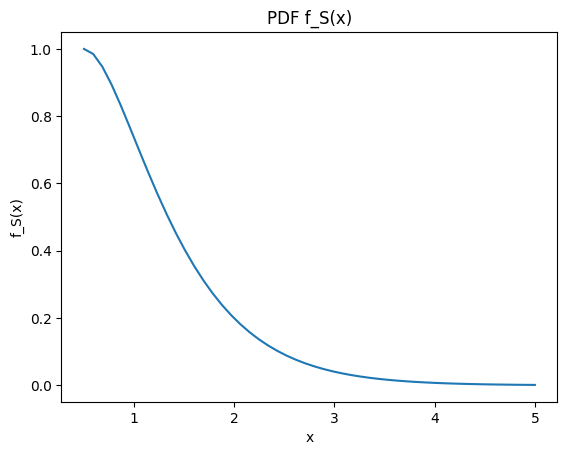

In [3]:
# f_S given via Canvas
def f_S(x):
    return x*sympy.exp(-2*x)

def ConstantToNormalizePDF(PDF, lower_bound, upper_bound):
    # Integrate the given unnormalized PDF to find the unnormalized CDF
    result = sp.integrate.quad(PDF, lower_bound, upper_bound)

    # Area under a CDF must be 1
    c = 1 / result[0]
    
    return c

# Lower and upper bounds given via Canvas
lower_bound = 0.5
upper_bound = math.inf

# Find the constant c to normalize the PDF
c = ConstantToNormalizePDF(f_S, lower_bound, upper_bound)

# Print the given unnormalized PDF and the constant c required to normalized this PDF
x = sympy.symbols('x')
f_S = f_S(x)
print(f"To normalize the PDF f_S = c*{f_S}, c = {c}.")

# Graph the normazlied PDF
PDF = sympy.lambdify(x, f_S, "numpy")
domain = np.linspace(0.5, 5)
plt.plot(domain, c*PDF(domain))
plt.title("PDF f_S(x)")
plt.xlabel("x")
plt.ylabel("f_S(x)")

### **Task 8 - CDF of a Given PDF**

The CDF of f_S(x) for x < 0.5 is F_S(x) = 0.
The CDF of f_S(x) for x > 0.5 is F_S(x) = 1.35914091422952*(-2*x - 1)*exp(-2*x) + 1.


Text(0, 0.5, 'F_S(x)')

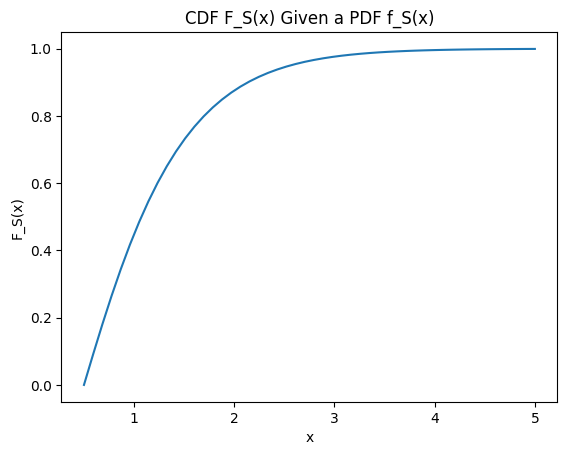

In [145]:
# Print the normalized CDF function for the given PDF for two cases: x < lower bound and x > lower bound
print(f"The CDF of f_S(x) for x < {lower_bound} is F_S(x) = 0.")
F_S = 1 + c*f_S.integrate(x)
print(f"The CDF of f_S(x) for x > {lower_bound} is F_S(x) = {F_S}.")

# Graph the normalized CDF for the given PDF
CDF = sympy.lambdify(x, F_S, "numpy")
plt.plot(domain, CDF(domain))
plt.title(f"CDF F_S(x) Given a PDF f_S(x)")
plt.xlabel("x")
plt.ylabel("F_S(x)")

### **Task 9 - Random Sampling Algorithm Implementation**

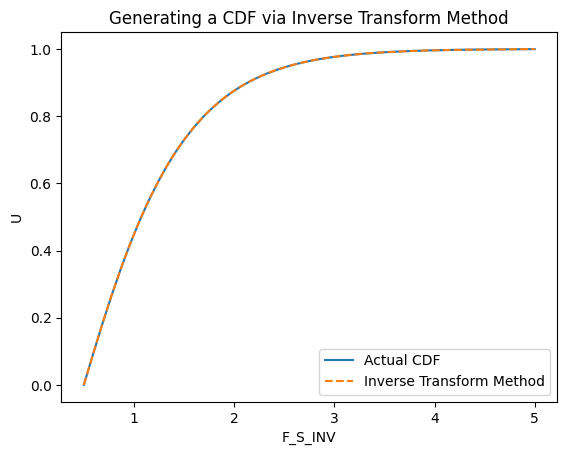

In [267]:
# PDF f_S given via Canvas
def PDF(x):
    return c*x*np.exp(-2*x)

# CDF F_S derived from Task 8
def CDF(x):
    return 1 - c*(1/2 * x + 1/4)*np.exp(-2*x)

# Bisection method to find the inverse of any CDF
def Bisection_Method(u, x_min, x_max):
    tolerance = 10**-12
    x = 0

    # The inverses are found by seeing if the different between the estimates are sufficiently small, which is where the actual value of x should be
    while (x_max - x_min) > tolerance:
        x = (x_min + x_max) / 2
        if CDF(x) > u:
            x_max = x
        else:
            x_min = x
    
    return x

# Inverse transform method with a uniform random variable to find S = F_S_inv(U)
def Inverse_Transform_Method(x_min, x_max, N):
    F_S_inv = []

    # Select N uniform random variables U ~ Unf(0, 1) and sort them in ascending order
    U = np.random.uniform(0, 1, N)
    U.sort()

    # Find the inverses F_S_inv for each element in U
    for i in range(len(U)):
        F_S_inv.append(Bisection_Method(U[i], x_min, x_max))
    
    return F_S_inv, U

# Set up parameters required to do the inverse transform method
N = 1000000
x_min = 0.5
x_max = 5

# Find the inverse transform with a uniform random variable
F_S_inv, U = Inverse_Transform_Method(x_min, x_max, N)

# Graph the CDF via the inverse transform method and compare it to the actual CDF graph from Task 8
x = np.linspace(0.5, 5)
plt.plot(x, CDF(x), '-', markersize='0.25', label='Actual CDF')
plt.plot(F_S_inv, U, '--', markersize='0.25', label='Inverse Transform Method')
plt.title(f"Generating a CDF via Inverse Transform Method")
plt.xlabel("F_S_INV")
plt.ylabel("U")
plt.legend()

### **Task 10 - Random Sampling Algorithm Execution**

In [268]:
# Generate random samples for graphing the PDF
def Generate_Random_Samples(x_min, x_max, N):
    # Generate the inverse CDF by performing the inverse transform method
    F_S_inv, U = Inverse_Transform_Method(x_min, x_max, N)

    # Put each F_S_inv value in f_S
    f_S = []
    for i in range(N):
        f_S.append(F_S_inv[i])
    
    return f_S

The computer took 0.06705403327941895 seconds to run this algorithm.


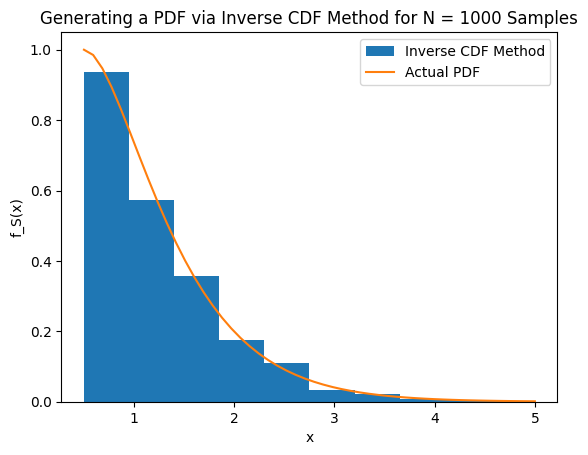

In [269]:
# Set up the parameters required for the inverse CDF method
x_min = 0.5
x_max = 5
N = 1000

# Run the inverse CDF algorithm and record how long it takes to do this
time_start = time.time()
f_S = Generate_Random_Samples(x_min, x_max, N)
time_end = time.time()

# Plot the histogram to estimate the PDF via the inverse CDF method
# Graph the actual PDF for comparison
plt.hist(f_S, density=True, bins=10, label='Inverse CDF Method')
x = np.linspace(0.5, 5)
plt.plot(x, PDF(x), '-', markersize='0.25', label='Actual PDF')
plt.title(f"Generating a PDF via Inverse CDF Method for N = {N} Samples")
plt.xlabel("x")
plt.ylabel("f_S(x)")
plt.legend()

# Calculate and print the time elapsed, the time took to run this algorithm
time_elapsed = time_end - time_start
print(f"The computer took {time_elapsed} seconds to run this algorithm.")

The computer took 0.6298177242279053 seconds to run this algorithm.


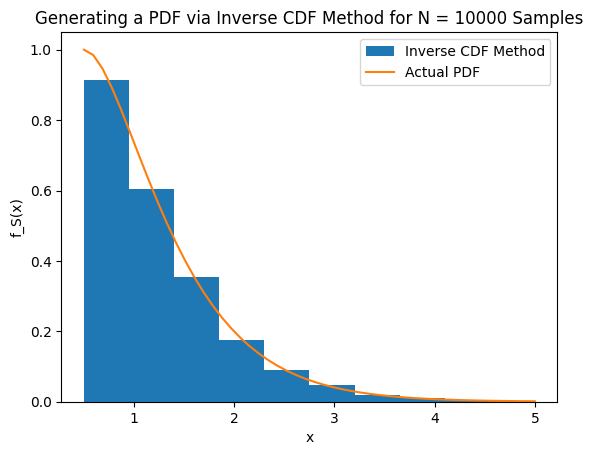

In [270]:
# Set up the parameters required for the inverse CDF method
x_min = 0.5
x_max = 5
N = 10000

# Run the inverse CDF algorithm and record how long it takes to do this
time_start = time.time()
f_S = Generate_Random_Samples(x_min, x_max, N)
time_end = time.time()

# Plot the histogram to estimate the PDF via the inverse CDF method
# Graph the actual PDF for comparison
plt.hist(f_S, density=True, bins=10, label='Inverse CDF Method')
x = np.linspace(0.5, 5)
plt.plot(x, PDF(x), '-', markersize='0.25', label='Actual PDF')
plt.title(f"Generating a PDF via Inverse CDF Method for N = {N} Samples")
plt.xlabel("x")
plt.ylabel("f_S(x)")
plt.legend()

# Calculate and print the time elapsed, the time took to run this algorithm
time_elapsed = time_end - time_start
print(f"The computer took {time_elapsed} seconds to run this algorithm.")

The computer took 6.120899677276611 seconds to run this algorithm.


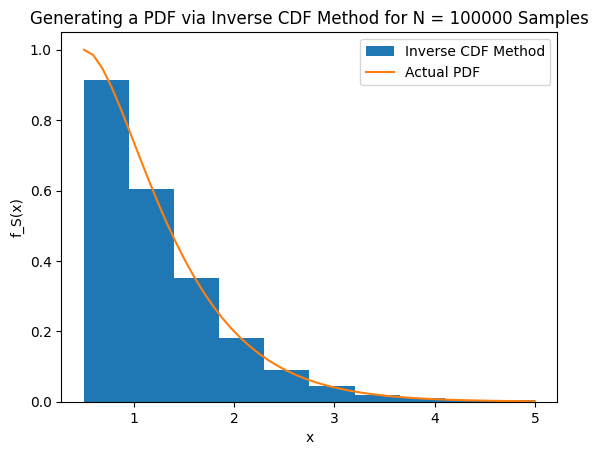

In [271]:
# Set up the parameters required for the inverse CDF method
x_min = 0.5
x_max = 5
N = 100000

# Run the inverse CDF algorithm and record how long it takes to do this
time_start = time.time()
f_S = Generate_Random_Samples(x_min, x_max, N)
time_end = time.time()

# Plot the histogram to estimate the PDF via the inverse CDF method
# Graph the actual PDF for comparison
plt.hist(f_S, density=True, bins=10, label='Inverse CDF Method')
x = np.linspace(0.5, 5)
plt.plot(x, PDF(x), '-', markersize='0.25', label='Actual PDF')
plt.title(f"Generating a PDF via Inverse CDF Method for N = {N} Samples")
plt.xlabel("x")
plt.ylabel("f_S(x)")
plt.legend()

# Calculate and print the time elapsed, the time took to run this algorithm
time_elapsed = time_end - time_start
print(f"The computer took {time_elapsed} seconds to run this algorithm.")

The computer took 74.06336450576782 seconds to run this algorithm.


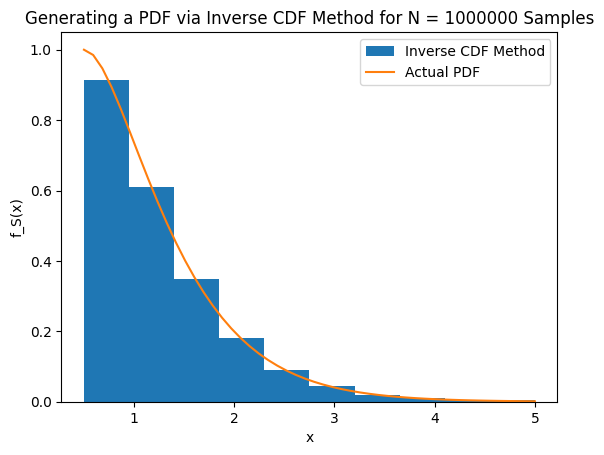

In [272]:
# Set up the parameters required for the inverse CDF method
x_min = 0.5
x_max = 5
N = 1000000

# Run the inverse CDF algorithm and record how long it takes to do this
time_start = time.time()
f_S = Generate_Random_Samples(x_min, x_max, N)
time_end = time.time()

# Plot the histogram to estimate the PDF via the inverse CDF method
# Graph the actual PDF for comparison
plt.hist(f_S, density=True, bins=10, label='Inverse CDF Method')
x = np.linspace(0.5, 5)
plt.plot(x, PDF(x), '-', markersize='0.25', label='Actual PDF')
plt.title(f"Generating a PDF via Inverse CDF Method for N = {N} Samples")
plt.xlabel("x")
plt.ylabel("f_S(x)")
plt.legend()

# Calculate and print the time elapsed, the time took to run this algorithm
time_elapsed = time_end - time_start
print(f"The computer took {time_elapsed} seconds to run this algorithm.")

### **Bonus Task (Extra Credit) - Verifying the Birthday Paradox**

In [36]:
# Generate a random birthday defined by integers from 1 to 365, inclusive
# Assume that birthdays (month/year) are uniformly distributed (ideal distribution of birthdays) and there are 365 days in a year
def Generate_Random_Birthday():
    random_birthday = random.randint(1, 365)
    return random_birthday

# Generate a list of n random birthdays for n people with an ideal distribution of birthdays
def Generate_n_Random_Birthdays(n):
    n_random_birthdays = [Generate_Random_Birthday() for i in range(n)]
    return n_random_birthdays

# See if there is at least one coincidence (a list that has at least two of the same birthday / elements) with an ideal distribution of birthdays
def At_Least_One_Coincidence(birthdays):
    # Eliminate any duplicate bithdays
    unique_birthdays = set(birthdays)

    # Find the total number of birthdays in the inputted list and the reduced list, if it was reduced
    total_birthdays = len(birthdays)
    total_unique_birthdays = len(unique_birthdays)

    # Test whether or not the list has been reduced
    # If the list has been reduced, there is a coincidence; if not, there are no coincidences
    has_coincidence = (total_birthdays != total_unique_birthdays)
    return has_coincidence

# Generate the probability of having at least one coincidence of birthdays for N trials and for n people with an ideal distribution of birthdays
def Probability_At_Least_One_Coincidence(N_trials, n_people):
    # Set up the parameters required to find the probability of at least one coincidence of birthdays and no coincidences of birthdays with an ideal distribution of birthdays
    at_least_one_coincidence_success = 0
    at_least_one_coincidence_failure = 0
    
    for i in range(N_trials):
        # Generate a set of n random birthdays for n peoplewith an ideal distribution of birthdays
        n_random_birthdays = Generate_n_Random_Birthdays(n_people)

        # Test to see whether or not the n random birthdays have at least one coincidence with an ideal distribution of birthdays
        has_coincidence = At_Least_One_Coincidence(n_random_birthdays)
        
        if has_coincidence:
            # Success for having at least one coincidence in n birthdays with an ideal distribution of birthdays
            at_least_one_coincidence_success += 1
        else:
            # Failure for having at least one coincidence in n birthdays with an ideal distribution of birthdays
            at_least_one_coincidence_failure += 1

        # Calculate the probabilities of having at least one coincidence of birthdays and no coincidence of birthdays in a group of n people with an ideal distribution of birthdays
        probability_at_least_one_coincidence = at_least_one_coincidence_success / (at_least_one_coincidence_success + at_least_one_coincidence_failure)
        probability_no_coincidence = at_least_one_coincidence_failure / (at_least_one_coincidence_success + at_least_one_coincidence_failure)
    
    return probability_at_least_one_coincidence, probability_no_coincidence

# Generate a probability distribution for the birthday paradox with an ideal distribution of birthdays
def Probability_Distribution_Birthday_Paradox(N_trials, min_people, max_people):
    # Set up the parameters required to graph the probability distributions of at least one coincidence of birthdays and no coincidences of birthdays with an ideal distribution of birthdays
    at_least_one_coincidence_success_probabilities = []
    no_coincidence_success_probabilities = []

    for i in range(min_people, max_people + 1):
        # Generate a set of n random birthdays for n people with an ideal distribution of birthdays
        probability_at_least_one_coincidence, probability_no_coincidence = Probability_At_Least_One_Coincidence(N_trials, i)

        # Add the probabilities of having at least one coincidence of birthdays and no coincidence of birthdays in a group of n people into their respective lists with an ideal distribution of birthdays
        at_least_one_coincidence_success_probabilities.append(probability_at_least_one_coincidence)
        no_coincidence_success_probabilities.append(probability_no_coincidence)
    
    # Find the minimum index i (number of people = i + 3) such that the birthday paradox is satisfied with an ideal distribution of birthdays
    for i in range(len(at_least_one_coincidence_success_probabilities)):
        if at_least_one_coincidence_success_probabilities[i] < 0.5 and at_least_one_coincidence_success_probabilities[i + 1] >= 0.5:
            print(f"There must be a minimum of {i + 3} people in a room to guarantee that the probability that there is at least one coincidence of birthdays is 0.5 for an ideal uniform birthday distribution.")

    # Graph the probability distributions to demonstrate the birthday paradox with an ideal distribution of birthdays
    plt.plot(at_least_one_coincidence_success_probabilities, label='At Least One Coincidence')
    plt.plot(no_coincidence_success_probabilities, label='No Coincidences')
    plt.title(f"The Birthday Paradox Simulation for N = {N} Trials for an Ideal Uniform Birthday Distribution")
    plt.xlabel("Number of People n")
    plt.ylabel("Probability")
    plt.legend()

There must be a minimum of 23 people in a room to guarantee that the probability that there is at least one coincidence of birthdays is 0.5 for an ideal uniform birthday distribution.


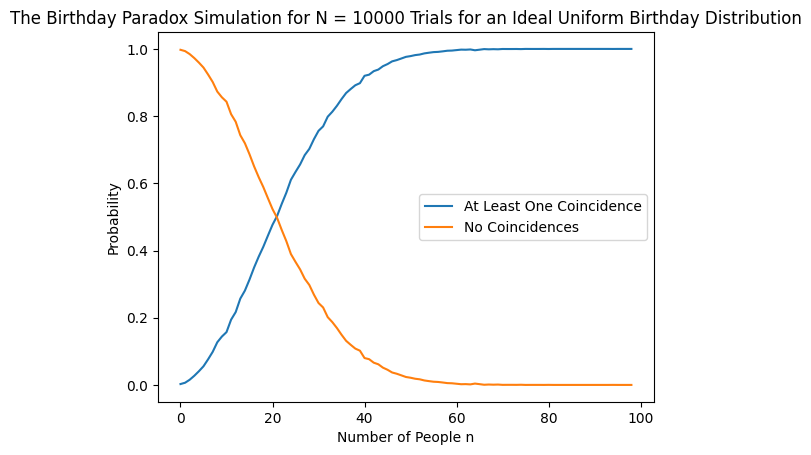

In [44]:
N = 10000
n = 100
Probability_Distribution_Birthday_Paradox(N, 2, n)

### **Bonus Task (Extra Credit) - The Birthday Paradox With Realistic Birthday Distributions**

A realistic birthday distribution by month and year are taken from this website: https://www.zippia.com/advice/most-least-common-birthdays/?survey_step=step3. Note that this distribution counts for the extra day in leap years (people born on February 29th), meaning that there are a total of 366 birthdays possible.

In [41]:
# Obtain the frequency distribution of birthdays, obtained from https://www.zippia.com/advice/most-least-common-birthdays/?survey_step=step3
# Note that this counts the leap year date February 29th, meaning that there are 366 days in a realistic birthday distribution (nonideal distribution of birthdays)
frequency_of_birthdays = [7792, 9307, 10813, 11019, 10953, 10911, 10925, 10610, 10624, 11023, 10975, 10934, 10622, 10976, 10546, 10623, 10901, 10883, 10691, 10825, 10824, 10673, 10865, 11049, 10951, 10843, 10823, 10835, 10567, 10752, 10883, 10929, 10949, 10843, 10905, 10685, 10794, 11149, 11063, 10893, 11015, 11015, 10898, 10604, 11636, 11188, 10948, 10854, 10940, 10673, 10886, 11008, 11111, 10927, 10904, 10974, 10727, 10858, 11053, 10462, 11129, 10802, 11074, 10989, 10979, 10921, 11087, 10976, 10765, 10940, 10931, 11003, 10654, 11119, 11011, 10773, 11137, 10954, 10914, 11003, 11181, 10967, 10739, 10921, 10974, 10888, 10895, 11045, 10873, 10714, 10779, 10300, 11004, 10899, 11219, 10900, 10639, 10859, 10890, 10830, 10826, 11059, 10953, 10389, 10812, 10883, 10909, 10897, 11004, 10891, 10714, 10817, 10877, 10864, 10845, 10996, 10882, 10664, 10803, 10735, 10731, 11002, 11113, 10903, 10717, 11073, 10949, 10945, 10955, 11040, 11071, 10744, 11016, 10697, 11070, 11157, 11283, 11122, 10899, 10999, 11193, 11254, 11288, 11525, 11367, 10827, 10401, 10693, 10797, 10782, 10901, 10719, 11164, 11345, 11256, 11221, 11164, 11240, 11160, 11025, 11083, 11222, 11160, 11196, 11041, 11288, 11078, 11265, 11253, 11339, 11176, 11502, 11298, 11130, 11244, 11328, 11406, 11374, 11590, 11557, 11351, 11547, 11860, 11828, 11304, 8796, 10404, 11487, 12108, 11944, 11769, 11738, 11794, 11565, 11181, 11680, 11754, 11768, 11718, 11772, 11545, 11428, 11664, 11686, 11699, 11607, 11768, 11581, 11410, 11614, 11593, 11599, 11516, 11775, 11580, 11332, 11569, 11610, 11586, 11589, 11951, 11721, 11491, 11608, 11749, 11468, 11692, 11921, 11788, 11548, 11681, 11637, 11771, 11643, 11825, 11655, 11452, 11576, 11620, 11737, 11855, 11924, 11800, 11555, 10930, 11000, 11119, 11216, 11431, 11293, 11398, 11992, 12301, 12143, 11503, 12224, 11801, 11882, 12087, 12072, 12148, 12055, 12229, 12107, 11813, 11920, 11974, 11945, 11866, 11993, 11861, 11554, 11572, 11489, 11720, 11572, 11674, 11490, 11272, 11335, 11324, 11309, 11137, 11556, 11268, 11014, 10768, 11149, 11261, 11115, 11296, 11149, 10850, 11065, 11057, 11156, 11046, 11276, 11183, 10928, 11032, 11102, 11012, 10815, 9978, 11350, 11081, 11130, 11129, 11191, 11081, 11308, 11180, 10927, 11039, 11141, 11077, 10742, 11240, 11229, 11022, 11125, 11173, 11255, 11442, 11567, 10664, 9883, 10015, 9954, 10044, 9718, 10096, 10764, 10855, 11251, 11182, 11142, 10981, 11132, 10958, 10741, 10893, 10849, 10951, 10883, 11440, 10855, 10952, 11191, 11352, 11481, 11675, 11935, 12009, 11680, 11388, 10338, 8069, 6574, 9543, 11665, 11855, 11956, 11889, 10394]

# Generate the distribution of birthdays from the frequency distribution of birthdays
distribution_of_birthdays = []
day = 1
for i in range(len(frequency_of_birthdays)):
    for j in range(frequency_of_birthdays[i]):
        distribution_of_birthdays.append(day)
    day += 1

# Randomize the birthdays
random.shuffle(distribution_of_birthdays)

# Generate a random birthday defined by indices with a nonideal distribution of birthdays
def Generate_Random_Birthday_Realistic():
    random_birthday_realistic_index = random.randint(0, len(distribution_of_birthdays) - 1)
    random_birthday_realistic = distribution_of_birthdays[random_birthday_realistic_index]
    return random_birthday_realistic

# Generate a list of n random birthdays for n people with a nonideal distribution of birthdays
def Generate_n_Random_Birthdays_Realistic(n):
    n_random_birthdays_realistic = [Generate_Random_Birthday_Realistic() for i in range(n)]
    return n_random_birthdays_realistic

# See if there is at least one coincidence (a list that has at least two of the same birthday / elements) with a nonideal distribution of birthdays
def At_Least_One_Coincidence_Realistic(birthdays):
    # Eliminate any duplicate bithdays
    unique_birthdays_realistic = set(birthdays)

    # Find the total number of birthdays in the inputted list and the reduced list, if it was reduced
    num_birthdays_realistic = len(birthdays)
    num_unique_birthdays_realistic = len(unique_birthdays_realistic)

    # Test whether or not the list has been reduced
    # If the list has been reduced, there is a coincidence; if not, there are no coincidences
    has_coincidence_realistic = (num_birthdays_realistic != num_unique_birthdays_realistic)
    return has_coincidence_realistic

# Generate the probability of having at least one coincidence of birthdays for N trials and for n people with a nonideal distribution of birthdays
def Probability_At_Least_One_Coincidence_Realistic(N_trials, n_people):
    # Set up the parameters required to find the probability of at least one coincidence of birthdays and no coincidences of birthdays with a nonideal distribution of birthdays
    at_least_one_coincidence_realistic_success = 0
    at_least_one_coincidence_realistic_failure = 0

    for i in range(N_trials):
        # Generate a set of n random birthdays for n people with a nonideal distribution of birthdays
        n_random_birthdays_realistic = Generate_n_Random_Birthdays_Realistic(n_people)
        
        # Test to see whether or not the n random birthdays have at least one coincidence with a nonideal distribution of birthdays
        has_coincidence_realistic = At_Least_One_Coincidence_Realistic(n_random_birthdays_realistic)

        if has_coincidence_realistic:
            # Success for having at least one coincidence in n birthdays with a nonideal distribution of birthdays
            at_least_one_coincidence_realistic_success += 1
        else:
            # Failure for having at least one coincidence in n birthdays with a nonideal distribution of birthdays
            at_least_one_coincidence_realistic_failure += 1
        
        # Calculate the probabilities of having at least one coincidence of birthdays and no coincidence of birthdays in a group of n people with a nonideal distribution of birthdays
        probability_at_least_one_coincidence_realistic = at_least_one_coincidence_realistic_success / (at_least_one_coincidence_realistic_success + at_least_one_coincidence_realistic_failure)
        probability_no_coincidence_realistic = at_least_one_coincidence_realistic_failure / (at_least_one_coincidence_realistic_success + at_least_one_coincidence_realistic_failure)
    
    return probability_at_least_one_coincidence_realistic, probability_no_coincidence_realistic

# Generate a probability distribution for the birthday paradox with a nonideal distribution of birthdays
def Probability_Distribution_Birthday_Paradox_Realistic(N_trials, min_people, max_people):
    # Set up the parameters required to graph the probability distributions of at least one coincidence of birthdays and no coincidences of birthdays with a nonideal distribution of birthdays
    at_least_one_coincidence_success_probabilities_realistic = []
    no_coincidence_success_probabilities_realistic = []
    
    for i in range(min_people, max_people + 1):
        # Generate a set of n random birthdays for n people with a nonideal distribution of birthdays
        probability_at_least_one_coincidence_realistic, probability_no_coincidence_realistic = Probability_At_Least_One_Coincidence_Realistic(N_trials, i)
        
        # Add the probabilities of having at least one coincidence of birthdays and no coincidence of birthdays in a group of n people into their respective lists with a nonideal distribution of birthdays
        at_least_one_coincidence_success_probabilities_realistic.append(probability_at_least_one_coincidence_realistic)
        no_coincidence_success_probabilities_realistic.append(probability_no_coincidence_realistic)
    
    # Find the minimum index i (number of people = i + 3) such that the birthday paradox is satisfied with a nonideal distribution of birthdays
    for i in range(len(at_least_one_coincidence_success_probabilities_realistic)):
        if at_least_one_coincidence_success_probabilities_realistic[i] < 0.5 and at_least_one_coincidence_success_probabilities_realistic[i + 1] >= 0.5:
            print(f"There must be a minimum of {i + 3} people in a room to guarantee that the probability that there is at least one coincidence of birthdays is 0.5 for a realistic birthday distribution.")

    # Graph the probability distributions to demonstrate the birthday paradox with a nonideal distribution of birthdays
    plt.plot(at_least_one_coincidence_success_probabilities_realistic, label='At Least One Coincidence')
    plt.plot(no_coincidence_success_probabilities_realistic, label='No Coincidence')
    plt.title(f"The Birthday Paradox Simulation for N = {N} Trials for a Realistic Birthday Distribution")
    plt.xlabel("Number of People n")
    plt.ylabel("Probability")
    plt.legend()

There must be a minimum of 23 people in a room to guarantee that the probability that there is at least one coincidence of birthdays is 0.5 for a realistic birthday distribution.


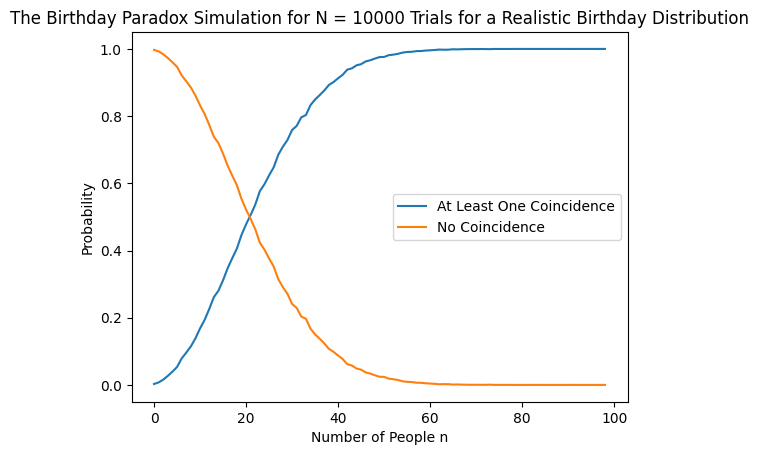

In [43]:
N = 10000
n = 100
Probability_Distribution_Birthday_Paradox_Realistic(N, 2, n)